In [69]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import re  #regular expression
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [71]:
customer = pd.read_csv("./Mall_Customers.csv")
customer.shape
customer.head()

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
new_columns = {x : re.sub('[^A-Za-z]+','',x) for x in customer.columns.values}
new_columns
customer.rename(columns = new_columns,inplace=True)
customer.rename(columns = {"AnnualIncomek": "AnnualIncome"},inplace=True)


{'CustomerID': 'CustomerID',
 'Gender': 'Gender',
 'Age': 'Age',
 'Annual Income (k$)': 'AnnualIncomek',
 'Spending Score (1-100)': 'SpendingScore'}

In [73]:
customer["Gender"] = customer["Gender"].map({"Female" : 0, "Male" : 1})
customer.drop(columns=["CustomerID"], inplace=True)
customer.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


/home/ayush/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.0, 112.1, '112')

Text(1.0, 88.1, '88')

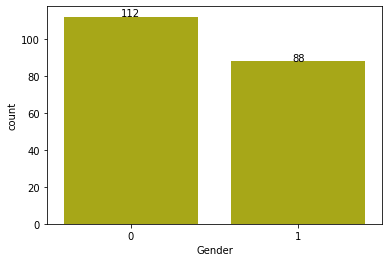

In [ ]:
values = customer["Gender"].value_counts()
ax = sns.countplot(customer["Gender"], color='y')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

<AxesSubplot:>

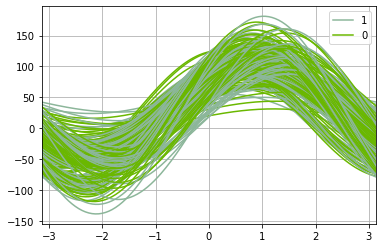

In [ ]:
andrews_curves(customer, "Gender")


<AxesSubplot:xlabel='Gender', ylabel='Age'>

<AxesSubplot:xlabel='Gender', ylabel='AnnualIncome'>

<AxesSubplot:xlabel='Gender', ylabel='SpendingScore'>

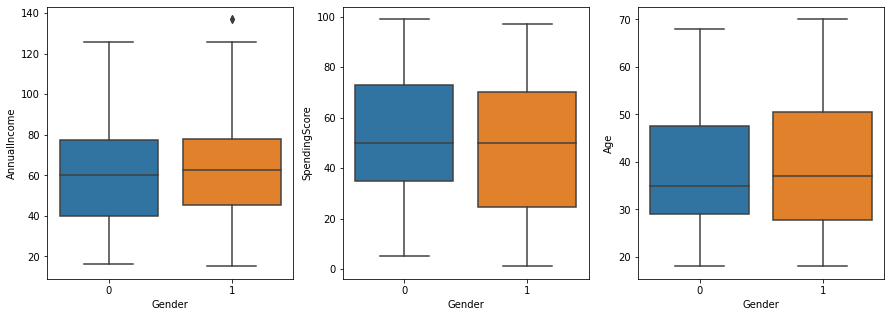

In [ ]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,3)
sns.boxplot(data=customer, x="Gender",y="Age")
ax=plt.subplot(1,3,1)
sns.boxplot(data=customer, x="Gender",y="AnnualIncome")
ax=plt.subplot(1,3,2)
sns.boxplot(data=customer, x="Gender",y="SpendingScore")

/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AnnualIncome', ylabel='Density'>

/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SpendingScore', ylabel='Density'>

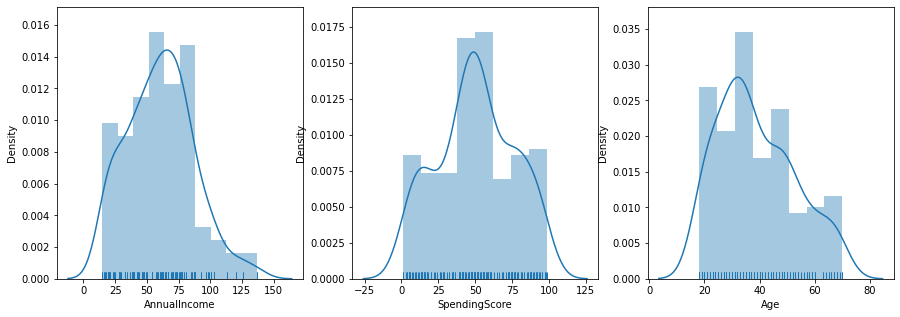

In [ ]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,3)
sns.distplot(customer.Age, rug=True)
ax=plt.subplot(1,3,1)
sns.distplot(customer.AnnualIncome, rug=True)
ax=plt.subplot(1,3,2)
sns.distplot(customer.SpendingScore, rug=True)

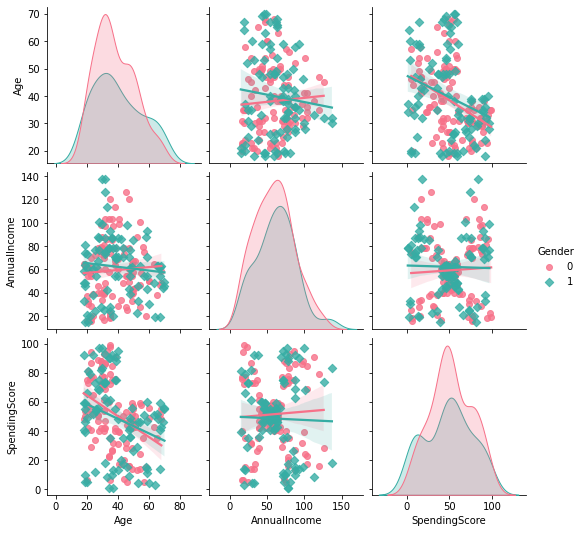

In [ ]:
sns.pairplot(customer, vars=["Age","AnnualIncome","SpendingScore"], diag_kind="kde"
             , kind="reg", hue="Gender", markers=["o","D"],palette="husl")

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

<AxesSubplot:xlabel='Age', ylabel='SpendingScore'>

<AxesSubplot:xlabel='AnnualIncome', ylabel='SpendingScore'>

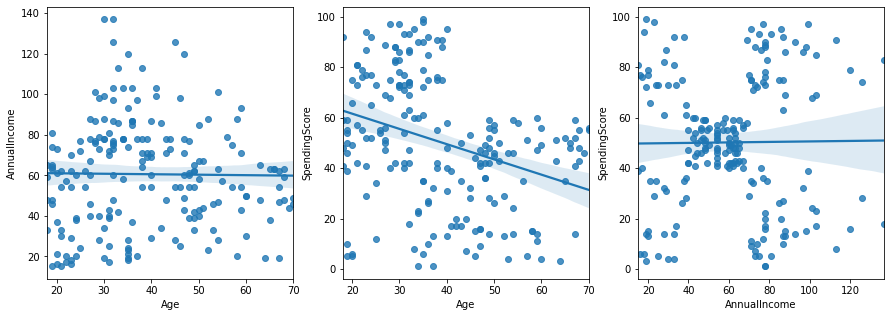

In [ ]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.regplot(data=customer, x="Age",y="AnnualIncome")
ax=plt.subplot(1,3,2)
sns.regplot(data=customer, x="Age",y="SpendingScore")
ax=plt.subplot(1,3,3)
sns.regplot(data=customer, x="AnnualIncome",y="SpendingScore")

Text(0.5, 0, 'Age')

Text(0.5, 0, 'AnnualIncome')

Text(0.5, 0, 'SpendingScore')

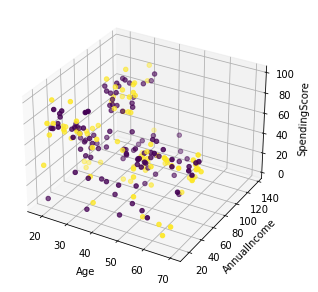

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter3D(customer['Age'], customer['AnnualIncome'], customer['SpendingScore']
             , c=customer['Gender']);
ax.set_xlabel('Age')
ax.set_ylabel('AnnualIncome')
ax.set_zlabel('SpendingScore')

Text(0.5, 0, 'Age')

Text(0.5, 0, 'AnnualIncome')

Text(0.5, 0, 'SpendingScore')

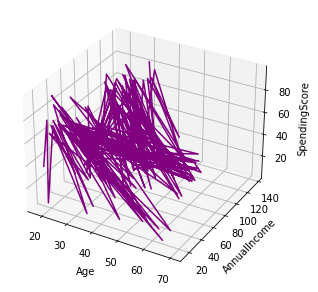

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.plot(customer['Age'], customer['AnnualIncome'], customer['SpendingScore'],color='purple');
ax.set_xlabel('Age')
ax.set_ylabel('AnnualIncome')
ax.set_zlabel('SpendingScore')

StandardScaler()

(200, 4)

GaussianMixture(n_init=10)

GaussianMixture(n_components=2, n_init=10)

GaussianMixture(n_components=3, n_init=10)

GaussianMixture(n_components=4, n_init=10)

GaussianMixture(n_components=5, n_init=10)

GaussianMixture(n_components=6, n_init=10)

GaussianMixture(n_components=7, n_init=10)

GaussianMixture(n_components=8, n_init=10)

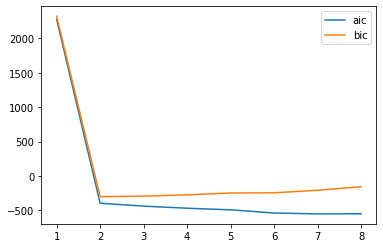

In [77]:
ss= StandardScaler()
ss.fit(customer)
X = ss.transform(customer)
X.shape
#Y = X['Spending']
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic,label='aic')
plt.plot([1,2,3,4,5,6,7,8], bic, label='bic')
plt.legend(loc='best')
plt.show()

GaussianMixture(n_components=2, n_init=10)

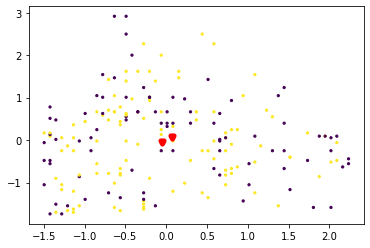

In [79]:
gm = GaussianMixture(
                     n_components = 2,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

fig = plt.figure()

plt.scatter(X[:, 1], X[:, 2],
            c=gm.predict(X),
            s=5)
plt.scatter(gm.means_[:, 1], gm.means_[:, 2],
            marker='v',
            s=10,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red',
            cmap='RdBu'
            )
plt.show()

GaussianMixture(n_components=2, n_init=10)

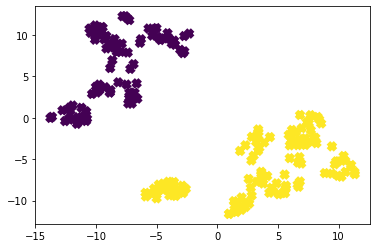

In [80]:
gm = GaussianMixture(
                     n_components = 2,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=50,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )

array([-0.83775397, -0.58035867, -2.54021473,  0.60920406,  1.27988046,
        0.63923725, -0.42793009, -0.15385373, -0.95962745,  1.255034  ,
       -0.74010882, -0.62903181, -0.02333736,  0.91367055, -0.13929249,
       -0.11562118,  1.54404036,  0.0107663 ,  0.79286646, -0.2814034 ,
        0.90060347,  0.46833768,  0.27975199,  0.80488019,  0.70935509,
        0.61201801,  1.83658325,  1.29383133,  1.9099709 ,  0.88014591,
       -0.10085505,  1.31980706,  0.28433426, -0.16847399,  1.17978766,
        1.19869139,  1.45547173,  1.96704855,  1.87527764,  1.44113103,
        0.16207586,  0.40752638,  1.71991627,  2.44416019,  1.98445734,
        2.01151231,  1.96745869,  2.15867154,  2.18508739,  2.32215985,
        2.19128031,  1.81267208,  2.57801103,  1.01789699,  2.22455838,
        1.91046142,  2.10022328,  0.25504407,  2.36198526,  1.75358906,
       -0.08254891,  1.06872815, -0.4070379 ,  1.56985232,  0.93018883,
        1.04475792,  2.72784013, -0.43310243,  1.13916927,  2.64

-0.7435201180427375

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 1.12815215, -1.42456879,  0.78018313, -1.75473454],
       [ 1.12815215, -0.41983513,  2.00160487, -1.63826986],
       [-0.88640526,  0.58489852,  2.26879087, -1.32769738],
       [-0.88640526,  0.44136514,  2.49780745, -0.86183865],
       [ 1.12815215, -0.49160182,  2.49780745,  0.92395314],
       [ 1.12815215, -0.49160182,  2.91767117, -1.25005425],
       [ 1.12815215, -0.6351352 ,  2.91767117,  1.27334719]])

(10, 4)

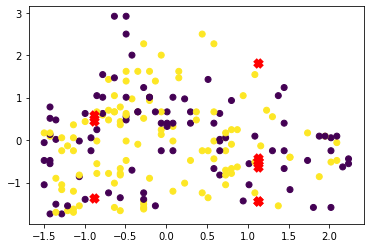

In [81]:
densities = gm.score_samples(X)
densities

density_threshold = np.percentile(densities,5)
density_threshold

anomalies = X[densities < density_threshold]
anomalies
anomalies.shape



fig = plt.figure()
plt.scatter(X[:, 1], X[:, 2], c = gm.predict(X))
plt.scatter(anomalies[:, 0], anomalies[:, 1],
            marker='x',
            s=50,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )

(190, 4)

/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

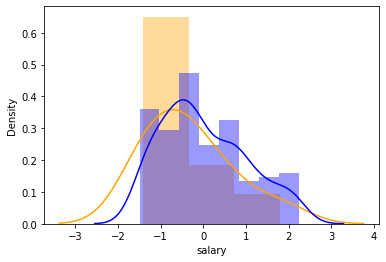

In [82]:
unanomalies = X[densities >= density_threshold]
unanomalies.shape   

df_anomalies = pd.DataFrame(anomalies[:,[1,2]], columns=['salary','spendingscore'])
df_anomalies['type'] = 'anomalous'   # Create a IIIrd constant column
df_normal = pd.DataFrame(unanomalies[:,[1,2]], columns=['salary','spendingscore'])
df_normal['type'] = 'unanomalous'    # Create a IIIrd constant column

sns.distplot(df_anomalies['salary'], color='orange')
sns.distplot(df_normal['salary'], color='blue')

/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spendingscore', ylabel='Density'>

/home/ayush/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spendingscore', ylabel='Density'>

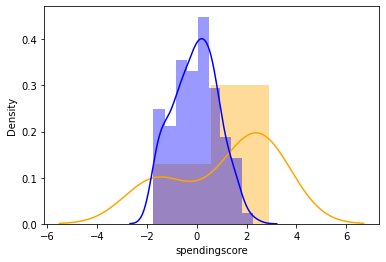

In [83]:
sns.distplot(df_anomalies['spendingscore'], color='orange')
sns.distplot(df_normal['spendingscore'], color='blue')

In [84]:
customer_NoGender = customer.copy() #Deep Copy
customer_NoGender.drop(columns=["Gender"], inplace = True)
#customer.head()
customer_NoGender.head()
ss= StandardScaler()
ss.fit(customer_NoGender)
X = ss.transform(customer_NoGender)

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


StandardScaler()

GaussianMixture(n_init=10)

GaussianMixture(n_components=2, n_init=10)

GaussianMixture(n_components=3, n_init=10)

GaussianMixture(n_components=4, n_init=10)

GaussianMixture(n_components=5, n_init=10)

GaussianMixture(n_components=6, n_init=10)

GaussianMixture(n_components=7, n_init=10)

GaussianMixture(n_components=8, n_init=10)

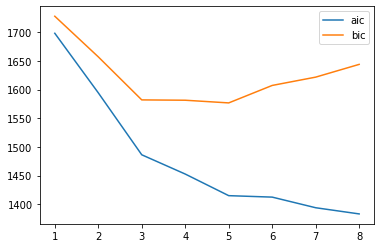

In [85]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

fig = plt.figure()

plt.plot([1,2,3,4,5,6,7,8], aic, label='aic')
plt.plot([1,2,3,4,5,6,7,8], bic, label='bic')
plt.legend(loc='best')
plt.show()

GaussianMixture(n_components=5, n_init=10)

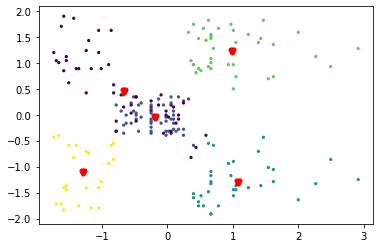

In [86]:
gm = GaussianMixture(
                     n_components = 5,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

fig = plt.figure()

plt.scatter(X[:, 1], X[:, 2],
            c=gm.predict(X),
            s=5)
plt.scatter(gm.means_[:, 1], gm.means_[:, 2],
            marker='v',
            s=10,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )


In [87]:
gm = GaussianMixture(
                     n_components = 5,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

GaussianMixture(n_components=5, n_init=10)

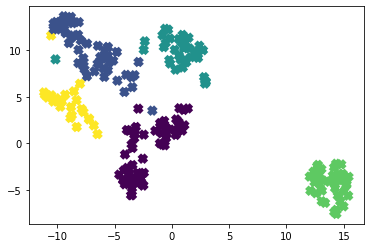

In [ ]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=50,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )

In [ ]:
voice_df = pd.read_csv('./voice.csv/voice.csv')
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
#We see some of the variables are highly correlated
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = voice_df.iloc[:,:-1]
y = voice_df.iloc[:,-1]


scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

male_female = LabelEncoder()
y = male_female.fit_transform(y)

StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

GaussianMixture(n_init=10)

GaussianMixture(n_components=2, n_init=10)

GaussianMixture(n_components=3, n_init=10)

GaussianMixture(n_components=4, n_init=10)

GaussianMixture(n_components=5, n_init=10)

GaussianMixture(n_components=6, n_init=10)

GaussianMixture(n_components=7, n_init=10)

GaussianMixture(n_components=8, n_init=10)

GaussianMixture(n_components=9, n_init=10)

GaussianMixture(n_components=10, n_init=10)

GaussianMixture(n_components=11, n_init=10)

GaussianMixture(n_components=12, n_init=10)

GaussianMixture(n_components=13, n_init=10)

GaussianMixture(n_components=14, n_init=10)

GaussianMixture(n_components=15, n_init=10)

GaussianMixture(n_components=16, n_init=10)

GaussianMixture(n_components=17, n_init=10)

GaussianMixture(n_components=18, n_init=10)

GaussianMixture(n_components=19, n_init=10)

GaussianMixture(n_components=20, n_init=10)

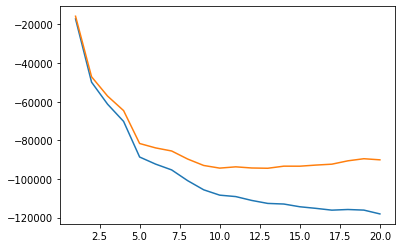

In [ ]:


bic = []
aic = []
for i in range(20):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], aic)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], bic)
plt.show()

GaussianMixture(n_components=10, n_init=10)

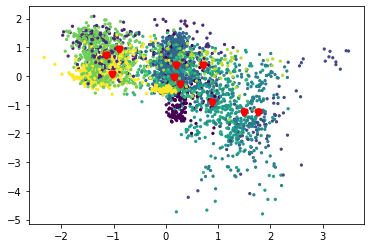

In [ ]:
gm = GaussianMixture(
                     n_components = 10,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)
#gm.means_
#gm.converged_
#gm.n_iter_
#gm.predict(X)
#gm.weights_
#np.unique(gm.predict(X), return_counts = True)[1]/len(X)
#gm.sample()
fig = plt.figure()

plt.scatter(X[:, 1], X[:, 2],
            c=gm.predict(X),
            s=5)
plt.scatter(gm.means_[:, 1], gm.means_[:, 2],
            marker='v',
            s=10,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )

In [ ]:
gm = GaussianMixture(
                     n_components = 10,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

GaussianMixture(n_components=10, n_init=10)

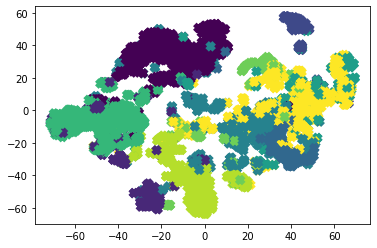

In [ ]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=50,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )